## Assignment 4

# Behnam Farhadi
### Student Number: 201994394

#### I did this Assignment individually but to solve the questions, I took templates from several sites, the most important of which I will mention

In [268]:
import pandas as pd
import matplotlib.pyplot as plt

In [269]:
df1 = pd.read_csv( 'game_consoles_untidy.csv' )
Car_dataf=pd.read_csv('used_cars.csv')

dfconsole=pd.read_csv('game_consoles.csv')

In [270]:
df1.variable.value_counts()

Units_sold    25
Type          25
Company       25
Release       25
Name: variable, dtype: int64

In [271]:
df1

,Console,variable,value
0,PlayStation 2,Units_sold,155000000
1,Nintendo DS family,Units_sold,154002000
2,Game Boy & Game Boy Color,Units_sold,118690000
3,PlayStation 4,Units_sold,116400000
4,PlayStation,Units_sold,102490000
...,...,...,...
95,PlayStation 5,Release,2020
96,Xbox Series X/S,Release,2020
97,Super NES Classic Edition,Release,2017
98,Color TV-Game,Release,1977


In [272]:
df1[df1.Console=='Super NES Classic Edition']

,Console,variable,value
22,Super NES Classic Edition,Units_sold,5280000
47,Super NES Classic Edition,Type,Dedicated
72,Super NES Classic Edition,Company,Nintendo
97,Super NES Classic Edition,Release,2017


In [273]:
tidydata=df1.pivot(index='Console', columns='variable', values='value').reset_index()

In [274]:
Car_dataf

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
99182,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,Volkswagen
99183,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,Volkswagen
99184,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,Volkswagen
99185,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,Volkswagen


In [275]:
car_dataf=Car_dataf[(Car_dataf.year >=2005) & (Car_dataf.year<=2019)]

In [276]:
car_dataf.year.unique()

array([2017, 2016, 2019, 2015, 2014, 2018, 2013, 2009, 2012, 2010, 2007,
       2011, 2008, 2005, 2006], dtype=int64)

In [277]:
type(car_dataf)

pandas.core.frame.DataFrame

In [278]:
lst=list(car_dataf.year.unique())
lst.sort(reverse=True)
data=[]

for i in lst:
  data.append(car_dataf[car_dataf.year==i].price)

price_data=[]
for i in range(len(lst)):
  price_data.append(data[i].tolist()) 

def plot_vilion(price_data):


    fig, ax = plt.subplots(figsize=(8,5))

  
    ax.violinplot(price_data, showmeans=False, showextrema=False, showmedians=True, vert=False, widths=0.8)

    ax.set_xlim(0,60000)
    ax.set_xticklabels(['0','10k','20k','30k','40k','50k','60k'])
    ax.set_xlabel('price')
    ax.set_yticks([15, 14, 13, 12,11,10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
    ax.set_yticklabels(['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])



    ax.set_title('Distribution of Used Car Prices')


<ipython-input-278-2a81140d9215>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','10k','20k','30k','40k','50k','60k'])


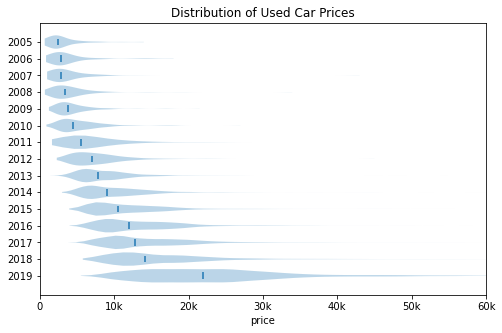

In [279]:
plot_vilion(price_data)

In [280]:
import squarify

In [281]:
Sony=dfconsole[dfconsole.Company=='Sony'].reset_index()
Nintendo=dfconsole[dfconsole.Company=='Nintendo'].reset_index()
microsoft=dfconsole[dfconsole.Company=='Microsoft'].reset_index()
overall=dfconsole[['Company','Units_sold']].groupby(by='Company').sum().reset_index().sort_values(by='Units_sold', ascending=False)

In [282]:
Sony

,index,Console,Type,Company,Release,Units_sold
0,0,PlayStation 2,Home,Sony,2000,155000000
1,3,PlayStation 4,Home,Sony,2013,116400000
2,4,PlayStation,Home,Sony,1994,102490000
3,7,PlayStation 3,Home,Sony,2006,87400000
4,10,PlayStation Portable,Handheld,Sony,2004,82000000
5,19,PlayStation Vita,Handheld,Sony,2011,15000000
6,20,PlayStation 5,Home,Sony,2020,10000000


In [283]:
overall

,Company,Units_sold
1,Nintendo,810632000
2,Sony,568290000
0,Microsoft,165500000


In [284]:
areas = list(overall.Units_sold)
areas.sort(reverse=True)

areas = squarify.normalize_sizes(areas, 1, 1)
rects = squarify.squarify(areas, 0, 0, 1, 1)

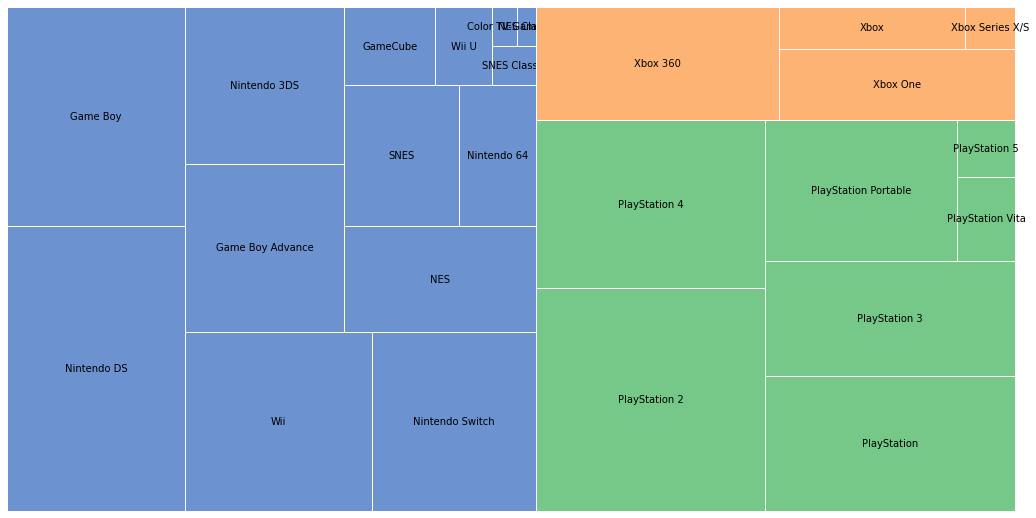

In [285]:
fig, ax= plt.subplots(figsize=(14,7))

axes=[]
for rect in rects:
    axes.append(fig.add_axes([rect['x'], rect['y'], rect['dx'], rect['dy'], ]))

    
ax.axis('off')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

squarify.plot(Nintendo.Units_sold, color=['#6C92D0'], label=Nintendo.Console, ax=axes[0],edgecolor="white")
squarify.plot(Sony.Units_sold, color=['#75C888'], label=Sony.Console, ax=axes[1], edgecolor="white")
squarify.plot(microsoft.Units_sold, color=['#FDB373'], label=microsoft.Console, ax=axes[2], edgecolor="white")






### For Q4 I refered to this pages:
#### https://github.com/elmotec/circlify
#### https://www.python-graph-gallery.com/circular-packing-1-level-hierarchy

In [286]:
import circlify

In [287]:
import circlify as clfy

In [288]:
Sony=dfconsole[dfconsole.Company=='Sony'].reset_index()
Nintendo=dfconsole[dfconsole.Company=='Nintendo'].reset_index()
microsoft=dfconsole[dfconsole.Company=='Microsoft'].reset_index()


In [289]:
sony=[]

s=len(Sony.Console)


for i in range(s):
 par = { 'id':Sony.Console[i],  'datum':Sony.Units_sold[i]  }
 sony.append(par)
sony

value=list(Sony.Units_sold)
label=list(Sony.Console)



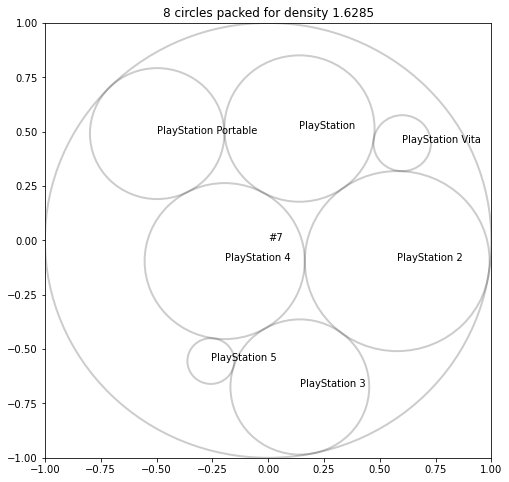

In [290]:
circles = circlify.circlify ( sony, show_enclosure=True, target_enclosure=circlify.Circle(x=0, y=0, r=1))

ax.set_title('Console Sales')


ax.axis('off')


circlify.bubbles(circles=circles)


In [291]:
nintendo=[]
n=len(Nintendo.Console)
for i in range(n):
 nar = { 'id':Nintendo.Console[i],  'datum':Nintendo.Units_sold[i]  }
 nintendo.append(nar)
nintendo

[{'id': 'Nintendo DS', 'datum': 154002000},
 {'id': 'Game Boy', 'datum': 118690000},
 {'id': 'Wii', 'datum': 101630000},
 {'id': 'Nintendo Switch', 'datum': 89040000},
 {'id': 'Game Boy Advance', 'datum': 81510000},
 {'id': 'Nintendo 3DS', 'datum': 75940000},
 {'id': 'NES', 'datum': 61910000},
 {'id': 'SNES', 'datum': 49100000},
 {'id': 'Nintendo 64', 'datum': 32930000},
 {'id': 'GameCube', 'datum': 21740000},
 {'id': 'Wii U', 'datum': 13560000},
 {'id': 'SNES Classic', 'datum': 5280000},
 {'id': 'Color TV-Game', 'datum': 3000000},
 {'id': 'NES Classic', 'datum': 2300000}]

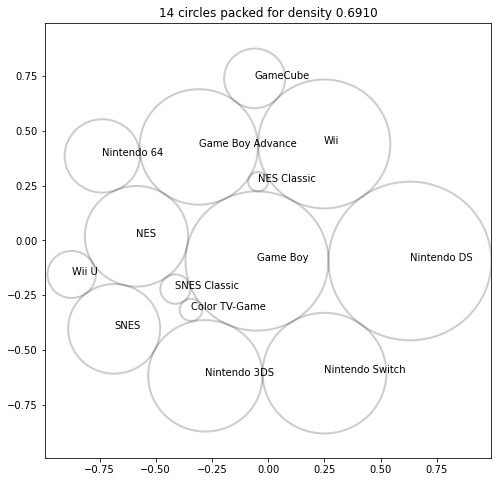

In [292]:
circles = circlify.circlify ( nintendo, show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0, r=1))

ax.set_title('Console Sales')


ax.axis('off')




circlify.bubbles(circles=circles)

In [293]:
micr=[]
m = len(microsoft.Console)
for i in range(m):
 mar = { 'id':microsoft.Console[i],  'datum':microsoft.Units_sold[i]  }
 micr.append( mar )
micr

[{'id': 'Xbox 360', 'datum': 84000000},
 {'id': 'Xbox One', 'datum': 51000000},
 {'id': 'Xbox', 'datum': 24000000},
 {'id': 'Xbox Series X/S', 'datum': 6500000}]

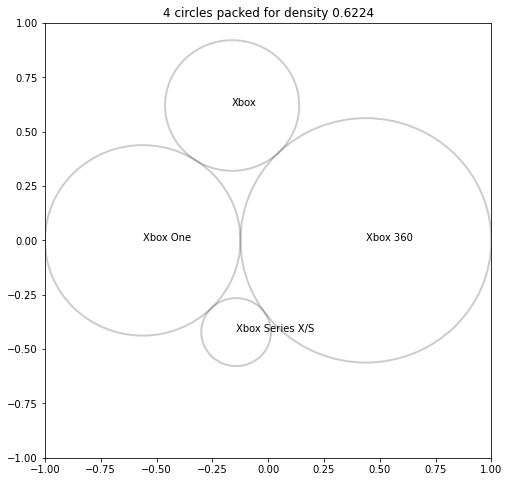

In [294]:
circles = circlify.circlify ( micr, show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0, r=1))
circlify.bubbles(circles=circles)



In [297]:
overall = [ {'id': '' , 'datum':0.15, 'children':micr, }, {'id': '' , 'datum':0.5, 'children':nintendo,}, {'id': '' , 'datum':0.3, 'children':sony,},]


circles = clfy.circlify(overall)

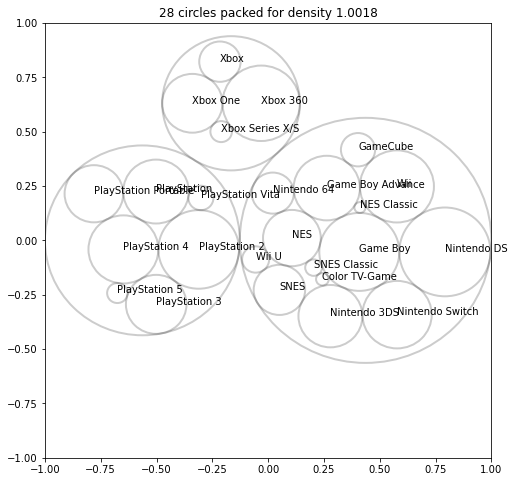

In [296]:
circlify.bubbles(circles=circles)


## I tried another solution based on below site to solve this Question but I couldn't finish it!
https://www.python-graph-gallery.com/circular-packing-1-level-hierarchy

[Circle(x=-0.2566869157451422, y=-0.5551521882897094, r=0.10516055606363812, level=1, ex={'datum': 10000000}), Circle(x=0.6006602008290026, y=0.44696644719015455, r=0.12879485171162847, level=1, ex={'datum': 15000000}), Circle(x=-0.49728726740763196, y=0.49103874871944364, r=0.30113400492676234, level=1, ex={'datum': 82000000}), Circle(x=0.1419291365025862, y=-0.6743344122928554, r=0.31089131525519115, level=1, ex={'datum': 87400000}), Circle(x=0.14008717623681785, y=0.514213933490763, r=0.3366616289562675, level=1, ex={'datum': 102490000}), Circle(x=-0.1946305204279494, y=-0.09537972708869526, r=0.35878094054838255, level=1, ex={'datum': 116400000}), Circle(x=0.5781679433607066, y=-0.09537972708869526, r=0.4140175232402736, level=1, ex={'datum': 155000000})]


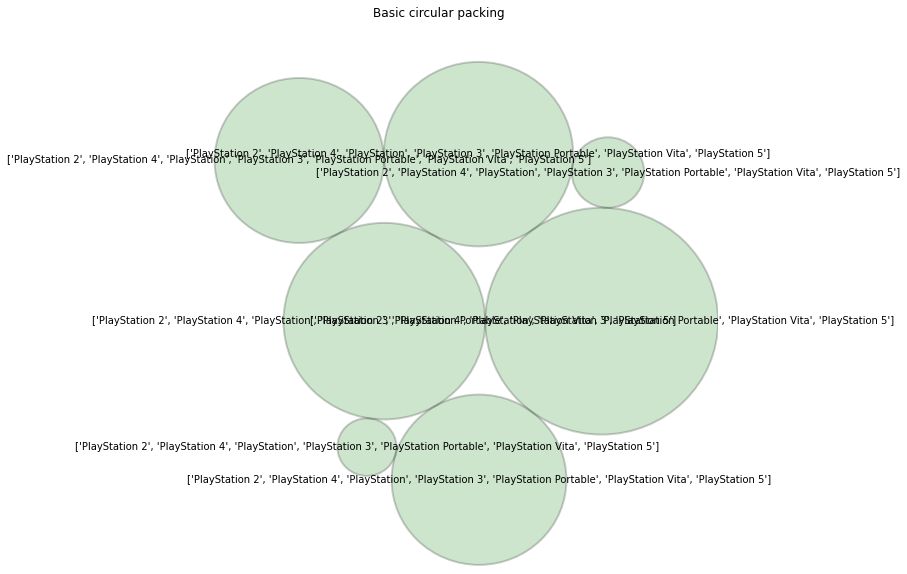

In [298]:
# import the circlify library
import circlify

# compute circle positions:
circles = circlify.circlify(
    d,
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
print(circles)


# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Basic circular packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = pd.DataFrame(label)

# print circles
for circle in circles:
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2, fill=True, facecolor='green', edgecolor="black"))
    
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )